# Import Libraries 

In [40]:
import datetime
import csv
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup 
import datetime
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

## Defining Variables Needed For Data Quality Checks

In [41]:
#Current Data Checks for ME

# - Difference in sum of cases by race v. Total cases (should be equal)

# - Difference in sum of cases by ethnicity v. Total cases (should be equal)

# - Difference in sum of deaths by race versus Total deaths (Within 5 values)

# - Difference in sum of deaths by ethnicity v. Total deaths (Within 5 values)



#These Data Checks are also included for ME, however in the Public CRDT hospital data is not listed.

# - Difference in sum of hopsital by hospital by race versus Total hospital might not be avaible

# - Difference in sum of hopsital by hospital by race versus Total hospital might not be avaible


#Variables needed
# 1) Sum of cases by Race
# 2) Sum of Cases by ethnicity
# 3) Sum of Deaths by Race
# 4) Sum of Deaths by Ethnicity
# 4) Total Cases
# 5) Total Deaths

## Downloading the Public CSV from CRDT

In [42]:
public_csv = pd.read_csv("https://docs.google.com/spreadsheets/d/1xF1cdazAejukTt2M6-aAXWG6fivTHFqt8rurF8euXOE/export?format=csv&gid=43720681")

## Defining Maine Covid Summary from the Public CSV

In [43]:
maine_covid_summary = public_csv[public_csv['State']== 'ME']

## Creating Total Cases,  Total Cases by Race and Total Cases by Ethnicity variables

In [44]:
#Most recent Total Cases Reported in Maine
total_cases = maine_covid_summary['Cases_Total'].iloc[0:1]

#Have to convert into a float in order to perform operations on total
total_cases = total_cases.astype(float)

print("Total Cases in Maine as of Today")
print(total_cases)


#Need to find case totals for each race (including other and unknown)

cases_white = maine_covid_summary['Cases_White'].iloc[0:1]
cases_white = cases_white.astype(float)

cases_black = maine_covid_summary['Cases_Black'].iloc[0:1]
cases_black = cases_black.astype(float)

cases_latinx = maine_covid_summary['Cases_LatinX'].iloc[0:1]
cases_latinx = cases_latinx.astype(float)

cases_asian = maine_covid_summary['Cases_Asian'].iloc[0:1]
cases_asian = cases_asian.astype(float)

cases_aian = maine_covid_summary['Cases_AIAN'].iloc[0:1]
cases_aian = cases_aian.astype(float)

cases_NHPI = maine_covid_summary['Cases_NHPI'].iloc[0:1]
cases_NHPI = cases_NHPI.astype(float)

cases_multi = maine_covid_summary['Cases_Multiracial'].iloc[0:1]
cases_multi = cases_multi.astype(float)

cases_other = maine_covid_summary['Cases_Other'].iloc[0:1]
cases_other = cases_other.astype(float)

cases_unknown = maine_covid_summary['Cases_Unknown'].iloc[0:1]
cases_unknown = cases_unknown.astype(float)


total_cases_race = cases_white + cases_black + cases_asian + cases_aian + cases_NHPI + cases_multi + cases_other + cases_unknown
print("Total Cases with Race in Maine")
print(total_cases_race)

#Need to find case totals for each ethnicity (including other and unknown)

cases_ethnicity_hispanic = maine_covid_summary['Cases_Ethnicity_Hispanic'].iloc[0:1]
cases_ethnicity_hispanic = cases_ethnicity_hispanic.astype(float)

cases_ethnicity_nonhispanic = maine_covid_summary['Cases_Ethnicity_NonHispanic'].iloc[0:1]
cases_ethnicity_nonhispanic = cases_ethnicity_nonhispanic.astype(float)

cases_ethnicity_unknown = maine_covid_summary['Cases_Ethnicity_Unknown'].iloc[0:1]
cases_ethnicity_unknown = cases_ethnicity_unknown.astype(float)

total_cases_ethnicity = cases_ethnicity_hispanic + cases_ethnicity_nonhispanic + cases_ethnicity_unknown
print("Total Cases with Ehtnicity in Maine")
print(total_cases_ethnicity)


Total Cases in Maine as of Today
23    8202.0
Name: Cases_Total, dtype: float64
Total Cases with Race in Maine
23    8202.0
dtype: float64
Total Cases with Ehtnicity in Maine
23    8202.0
dtype: float64


## Creating Total Deaths,  Total Deaths by Race and Total Deaths by Ethnicity variables

In [45]:
#Most recent Total Cases Reported in Maine
total_deaths = maine_covid_summary['Deaths_Total'].iloc[0:1]

#Have to convert into a float in order to perform operations on total
total_deaths = total_deaths.astype(float)

#Printing out Total Deaths
print("Total Deaths in Maine as of Today")
print(total_deaths)


#Need to find death totals for each race (including other and unknown)

deaths_white = maine_covid_summary['Deaths_White'].iloc[0:1]
deaths_white = deaths_white.astype(float)

deaths_black = maine_covid_summary['Deaths_Black'].iloc[0:1]
deaths_black = deaths_black.astype(float)

deaths_latinx = maine_covid_summary['Deaths_LatinX'].iloc[0:1]
deaths_latinx = deaths_latinx.astype(float)

deaths_asian = maine_covid_summary['Deaths_Asian'].iloc[0:1]
deaths_asian = deaths_asian.astype(float)

deaths_aian = maine_covid_summary['Deaths_AIAN'].iloc[0:1]
deaths_aian = deaths_aian.astype(float)

deaths_NHPI = maine_covid_summary['Deaths_NHPI'].iloc[0:1]
deaths_NHPI = deaths_NHPI.astype(float)

deaths_multi = maine_covid_summary['Deaths_Multiracial'].iloc[0:1]
deaths_multi = deaths_multi.astype(float)

deaths_other = maine_covid_summary['Deaths_Other'].iloc[0:1]
deaths_other = deaths_other.astype(float)

deaths_unknown = maine_covid_summary['Deaths_Unknown'].iloc[0:1]
deaths_unknown = deaths_unknown.astype(float)


total_deaths_race = deaths_white + deaths_black + deaths_asian + deaths_aian + deaths_NHPI + deaths_multi + deaths_other + deaths_unknown

print("Total Deaths with Race in Maine")
print(total_deaths_race)


#Need to find death totals for each ethnicity (including other and unknown)

deaths_ethnicity_hispanic = maine_covid_summary['Deaths_Ethnicity_Hispanic'].iloc[0:1]
deaths_ethnicity_hispanic = deaths_ethnicity_hispanic.astype(float)

deaths_ethnicity_nonhispanic = maine_covid_summary['Deaths_Ethnicity_NonHispanic'].iloc[0:1]
deaths_ethnicity_nonhispanic = deaths_ethnicity_nonhispanic.astype(float)

deaths_ethnicity_unknown = maine_covid_summary['Deaths_Ethnicity_Unknown'].iloc[0:1]
cases_ethnicity_unknown = cases_ethnicity_unknown.astype(float)

total_deaths_ethnicity = deaths_ethnicity_hispanic + deaths_ethnicity_nonhispanic + deaths_ethnicity_unknown

print("Total Deaths with Ethnicity in Maine")
print(total_deaths_ethnicity)

Total Deaths in Maine as of Today
23    158.0
Name: Deaths_Total, dtype: float64
Total Deaths with Race in Maine
23    158.0
dtype: float64
Total Deaths with Ethnicity in Maine
23    158.0
dtype: float64


## Data Quality Checking Clause

In [46]:
#Checking if Total Cases and Cases with Race are equal.
#If not equal will print "Data Quality Check Needed."
if total_cases - total_cases_race != 0:
    print("Data Quality Check Needed.")

    
#Checking if Total Cases and Cases with Ethnicity are equal.  
#If not equal will print "Data Quality Check Needed."    
if total_cases - total_cases_ethnicity != 0:
    print("Data Quality Check Needed.")
    
    
#Checking if Total Deaths and Deaths with Race are within 5 values.  
#If not equal will print "Data Quality Check Needed."    
if total_deaths - total_deaths_race > 5:
    print("Data Quality Check Needed.")
    

#Checking if Total Deaths and Deaths with Ethnicity are within 5 values.  
#If not equal will print "Data Quality Check Needed."  
if total_deaths - total_deaths_ethnicity > 5:
    print("Data Quality Check Needed.")
    
#Currently have invalid syntax, will fix later.

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Creating a Case Each Day Column to use in Time Series Plots

In [47]:
#In order to find Total Cases Each Day need to subtract next row from previous row
#However first need to convert column type to float
maine_covid_summary['Cases_Total'] = maine_covid_summary['Cases_Total'].astype(float)
cases_each_day = maine_covid_summary['Cases_Total'].diff(periods=-1)

#Adding Cases Each Day as a column
maine_covid_summary['Cases Each Day'] = cases_each_day

<ipython-input-47-354296f65de7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Cases_Total'] = maine_covid_summary['Cases_Total'].astype(float)
<ipython-input-47-354296f65de7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Cases Each Day'] = cases_each_day


## Creating a Date Time Column to use In Time Series Plot

In [48]:
#Structuring the Date to be in YYYY/MM/DD format
date_strings = []

for dates in maine_covid_summary['Date'].astype(str):
    date_formatted = dates[0:4] + "/" + dates[4:6] + "/" + dates[6:8]
    date_strings.append(date_formatted)
    
maine_covid_summary["Date Time"] = date_strings

maine_covid_summary['Date Time'] =  pd.to_datetime(maine_covid_summary['Date Time'], format='%Y/%m/%d')  

<ipython-input-48-4db022e0de27>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary["Date Time"] = date_strings
<ipython-input-48-4db022e0de27>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Date Time'] =  pd.to_datetime(maine_covid_summary['Date Time'], format='%Y/%m/%d')


## Creating a Deaths Each Day Column to use in Time Series Plots

In [49]:
#Apply the same method
maine_covid_summary['Deaths_Total'] = maine_covid_summary['Deaths_Total'].astype(float)
deaths_each_day = maine_covid_summary['Deaths_Total'].diff(periods=-1)


#Adding Cases Each Day as a column
maine_covid_summary['Deaths Each Day'] = deaths_each_day

<ipython-input-49-362531065d8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Deaths_Total'] = maine_covid_summary['Deaths_Total'].astype(float)
<ipython-input-49-362531065d8d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Deaths Each Day'] = deaths_each_day


## Time Series Plots

<AxesSubplot:title={'center':'Cases Each Day: Maine'}, xlabel='Date Time'>

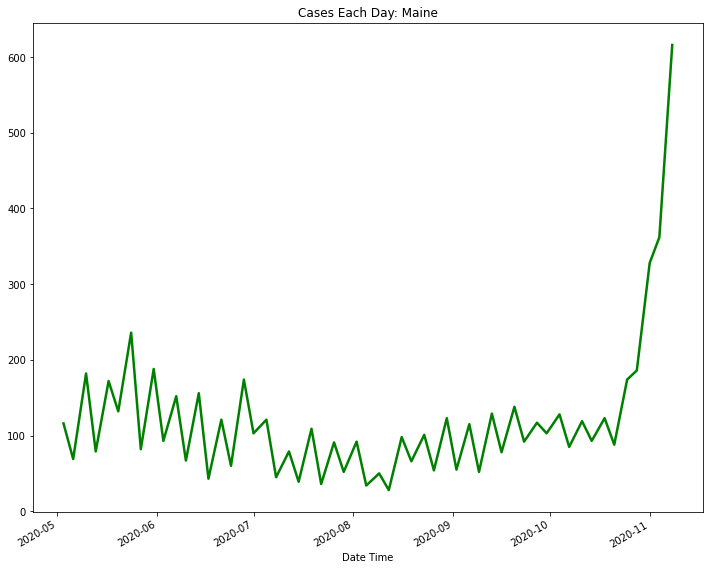

In [26]:
maine_covid_summary.set_index('Date Time')['Cases Each Day'].plot(figsize=(12, 10), title='Cases Each Day: Maine'
                                                                        ,linewidth=2.5, color='green')


<AxesSubplot:title={'center':'Deaths Each Day: Maine'}, xlabel='Date Time'>

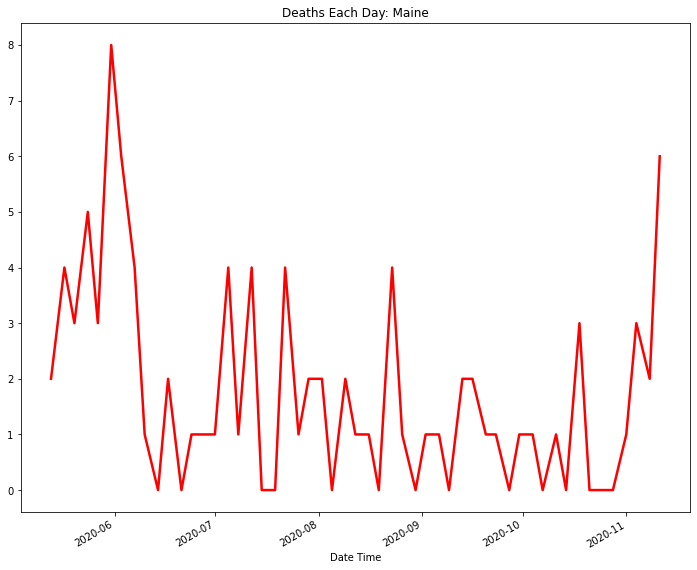

In [36]:
maine_covid_summary.set_index('Date Time')['Deaths Each Day'].plot(figsize=(12, 10), title='Deaths Each Day: Maine'
                                                                        ,linewidth=2.5, color='red')

